In [1]:
import numpy as np

# Создание датасета

Датасет был создан в файле perser.py, и предобработан в read_json.py

# Предобработка

In [2]:
data = np.load('songs.npy')
data

array([['ive been dyin to tell youanything you want to hearcause thats just who i am this weeklie in the grass next to the mausoleumim just a notch in your bedpost but youre just a line in a songnotch in your bedpost but youre just a line in a songdrop a heartand break a namewere always sleeping in and sleepingfor the wrong teamwere goin down down in an earlier roundand sugar were going down swinginill be your number one with a bulleta loaded god complex cock it and pull itwere goin down down in an earlier roundand sugar were going down swinginill be your number one with a bulleta loaded god complex cock it and pull itis this more than you bargained for yetoh dont mind me im watchingyou two from the closetwishing to be the friction in your jeansisnt it messed up how im just dyin to be himim just a notch in your bedpost but youre just a line in a songnotch in your bedpost but youre just a line in a songyou might also likedrop a heartand break a namewere always sleeping in and sleepingfo

In [3]:
X = data[:, 0]
y = data[:, 1]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

obj = TfidfVectorizer()
X_new = obj.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7)

In [37]:
from sklearn.preprocessing import LabelEncoder

# Инициализация и применение LabelEncoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform()

# Вывод преобразованных меток кластеров
print("Преобразованные метки кластеров:", true_labels_encoded)


Преобразованные метки кластеров: [0 4 5 3 6 2 7 1]


# KMeans

In [40]:
labels = [i for i in range(len(list(set(y))))]
labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [43]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=8)
cluster_labels = clusterer.fit(X_train)
print(cluster_labels)

# clf.fit(X_train)
#
# cluster_labels = clf.labels_
#
# Вывод меток кластеров для каждой песни
# for i, label in enumerate(cluster_labels):
#     print(f"Песня {i+1} отнесена к кластеру {label+1}")


KMeans()


In [27]:
y_pred = clf.predict(X_test)

# Проверим результаты

In [26]:
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 2, 3, 3, 4, 4,
       3, 3, 4, 3, 3, 3, 3, 0, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 0, 3, 4,
       3, 3, 0, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 3, 4, 4, 3,
       3, 1, 3, 0, 4, 3, 3, 4, 2, 3, 3, 4, 4, 3, 3, 0, 4, 4, 3, 3, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 0, 3, 3, 0, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3,
       3, 4], dtype=int32)

In [29]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Имитация реальных меток (жанров или исполнителей)
true_labels = y_test

# Вычисление Adjusted Rand Index
ari_score = adjusted_rand_score(y_test, y_pred)
print("Adjusted Rand Index:", ari_score)

# Вычисление Normalized Mutual Information
nmi_score = normalized_mutual_info_score(y_test, y_pred)
print("Normalized Mutual Information:", nmi_score)


Adjusted Rand Index: 0.025245262518774167
Normalized Mutual Information: 0.11835890799105639


ValueError: x and y must be the same size

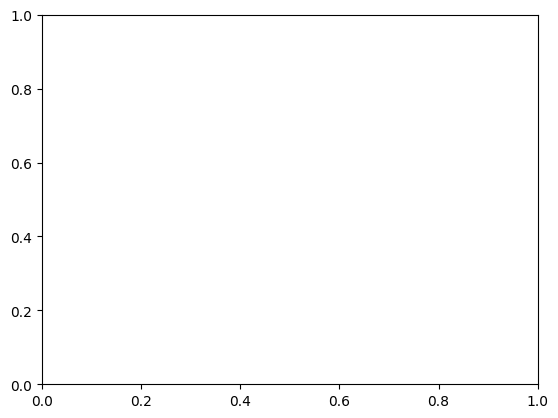

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Преобразование TF-IDF матрицы с помощью метода PCA
# pca = PCA(n_components=2)
# tfidf_matrix_2d = pca.fit_transform(X_test)

# Визуализация кластеров
plt.scatter(X_test[:, 0], y_pred, c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Кластеризация текстовых данных')
plt.colorbar(label='Cluster')
plt.show()
